# Prereading

Familiarize yourself with the following.


## Markov Transition Kernels

---

For two states $s_0$ and $s_1$ and a matrix representing transition probabilities

$\left[\begin{array}{cc}\Pr(s_0 \rightarrow s_0) & \Pr(s_1 \rightarrow s_0)\\\Pr(s_0 \rightarrow s_1)& \Pr(s_1 \rightarrow s_1)\end{array}\right]  \left[\begin{array}{c}s_0^{(0)}\\ s_1^{(0)}\end{array}\right] = \left[\begin{array}{c}\Pr(s_0^{(1)} = s_0)\\ \Pr(s_1^{(0)} = s_1)\end{array}\right]$

For example 

- $\left[\begin{array}{cc}0.5 & 0.25\\0.5&0.75\end{array}\right] \left[\begin{array}{c}1\\ 0\end{array}\right] = \left[\begin{array}{c}0.5\\ 0.5\end{array}\right]$  

and 

- $\left[\begin{array}{cc}0.5 & 0.25\\0.5&0.75\end{array}\right] \left[\begin{array}{c}0\\ 1\end{array}\right] = \left[\begin{array}{c}0.25\\ 0.75\end{array}\right]$ 

and after $T$ transitions 

$\begin{align}
\left[\begin{array}{cc}0.5 & 0.25\\0.5&0.75\end{array}\right]^T \left[\begin{array}{c}s_0^{(0)}\\ s_1^{(0)}\end{array}\right] & \approx {} \left[\begin{array}{cc}1/3& 1/3\\2/3&2/3\end{array}\right] \left[\begin{array}{c}s_0^{(0)}\\ s_1^{(0)}\end{array}\right] \quad \textrm{ for large } T\\ 
&={} \left[\begin{array}{c}s_0^{(T)}\\ s_1^{(T)}\end{array}\right] = \left[\begin{array}{c}1/3\\2/3\end{array}\right]\quad 
\color{gray}{\textrm{ for $s_j^{(0)}>0$ and } s_0^{(0)}+s_1^{(0)}=1 }
\end{align}
$



In [ ]:
import numpy as np

A = np.array([[.5,.25],[.5,.75]]) 
s_t0 = np.array([[1],[0]]) 
s_t1 = A @ s_t0  # A.dot(np.array([[1],[0]]))
s_t1

In [ ]:
s_t = s_t1

In [ ]:
s_t = A @ s_t
s_t

In [ ]:
A = np.array([[.5,.25],[.5,.75]]) 

In [ ]:
# Repeatedly run this cell this a lot of times until convergence
A = A @ A  # A.dot(A)  
# and A**T is not right as that would be done is element-wise
A

In [ ]:
# Hmm...
A @ s_t0

In [ ]:
# And intial value doesn't matter
A @ (1-s_t0)

In [ ]:
A @ np.array([[0.25],[0.75]]) 

In [ ]:
from scipy import stats 
import matplotlib.pyplot as plt

In [ ]:
# Here's what it looks like if we flip coins  
# with transition probabilties defind by A sequentially
# and sure enough we recover 1/3 and 2/3 for 0 and 1 respectively
A = np.array([[.5,.25],[.5,.75]]) 
T = 200
s_t = np.zeros(T, dtype=int)
for t in range(1, T):
    s_t[t] = int(stats.uniform().rvs() < A[:,s_t[t-1]][1])
    
fig,ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(s_t)
ax[1].hist(s_t, bins=2, density=True);

In [ ]:
A

`A` here means that

- if we're currently a $0$ there's a 50\% chance that we'll stay a $0$ and 50\% chance that we'll change to a $1$
- and if we're currently a $1$ there's a 75\% chance that we'll stay a $1$ and 25\% chance that we'll change to a $0$

which specifies [geometric distributions](https://en.wikipedia.org/wiki/Geometric_distribution) with, respectively, expected values of $1$ and $3$ "failures before transitioning to the other state" which means that on average a "$0$ state" will be a run of two $0$'s while a "$1$ state" will be a run of four $1$'s which leads to the desired one-to-two (or one-thirds to two-thirds) ratio of $0$'s and $1$ is the Markov Chain. 


In [ ]:
# Here's what it looks like if we flip coins  
# with transition probabilties defind by A 
# and sure enough we recover 1/3 and 2/3 for 0 and 1 respectively
T = 10000
s_t = np.zeros(T, dtype=int)
for t in range(1, T):
    s_t[t] = int(stats.uniform().rvs() < A[:,s_t[t-1]][1])
    
state0_run_length = []
state1_run_length = []
run_length = 1
for t in range(1,T):
    if s_t[t]==s_t[t-1]:
        run_length += 1
    else:
        if s_t[t-1] == 0:
            state0_run_length += [run_length]
        else:
            state1_run_length += [run_length]        
        run_length = 1
        
fig,ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].hist(state0_run_length)
ax[0].set_title("0 run lengths on aveage here are "+str(np.mean(state0_run_length).round(3)))
ax[1].hist(state1_run_length)
ax[1].set_title("1 run lengths on aveage here are "+str(np.mean(state1_run_length).round(3)));


## Metropolis-Hastings Transition Kernels

---

Accepting draws from a ***proposal distribution*** 

$\tilde x^{(t)} \sim q(\tilde x^{(t)}|x^{(t-1)})$

according to 

$x^{(t)} = \left\{\begin{array}{ll}
\tilde x^{(t)} & \text{with probability } \min\left(1,\frac{p(\tilde x^{(t)})}{p(x^{(t-1)})}\frac{q(x^{(t-1)}|\tilde x^{(t)})}{q(\tilde x^{(t)}|x^{(t-1)})}\right) \quad \color{gray}{\text{... is the normalizing constant needed for $p$?}}\\
x^{(t-1)} & \text{otherwise}
\end{array}\right.$

will produce draws from $p(x^{(t)})$.

### Discrete example

Suppose

$\begin{align}
q(\tilde x^{(t)} | x^{(t-1)}) &={} \left(\frac{1}{2}\right)^{1-{\tilde x^{(t)}}}\left(\frac{1}{2}\right)^{\tilde x^{(t)}} \quad \color{gray}{\textrm{ ... does } \quad \frac{q(x^{(t-1)}|\tilde x^{(t)})}{q(\tilde x^{(t)}|x^{(t-1)})} \quad  \textrm{ cancel?}}\\
\textrm{and} \quad p(x^{(t)}) &={} \left(\frac{1}{3}\right)^{1-{x^{(t)}}}\left(\frac{2}{3}\right)^{x^{(t)}}\\
\end{align}$

then 

$
\require{cancel}
\begin{align*}
\left[\begin{array}{cc}\Pr(s_0 \rightarrow s_0) & \Pr(s_1 \rightarrow s_0)\\\Pr(s_0 \rightarrow s_1)& \Pr(s_1 \rightarrow s_1)\end{array}\right] 
 &={} \left[\begin{array}{c|c} q(\tilde x^{(t)}=0 | x^{(t-1)}=0) & q(\tilde x^{(t)}=0 | x^{(t-1)}=1) \frac{p(\tilde x^{(t)}=0)}{p(x^{(t-1)}=1)} \\ 
+ \; \cancel{q(\tilde x^{(t)}=1 | x^{(t-1)}=0)\left(1-\cdots \right)}^0 & + \cancel{q(\tilde x^{(t)}=1 | x^{(t-1)}=1)\left(1-\cdots \right)}^0 \\ \hline
q(\tilde x^{(t)}=1 | x^{(t-1)}=0) \cancel{\frac{p(\tilde x^{(t)}=1)}{p(x^{(t-1)}=0)}}^1 & q(\tilde x^{(t)}=1 | x^{(t-1)}=1)\\
+ \cancel{q(\tilde x^{(t)}=0 | x^{(t-1)}=0)\left(1-\cdots \right)}^0 & +\; q(\tilde x^{(t)}=0 | x^{(t-1)}=1) (1- \frac{p(\tilde x^{(t)}=0)}{p(x^{(t-1)}=1)})\end{array}\right]\\
&={} \left[\begin{array}{cl} 0.5 & 0.25 = (1/2)((1/3)/(2/3)) \\ 0.5 & 0.75 = 1/2 + (1/2)(1-(1/3)/(2/3))\end{array}\right]
\end{align*}$

which was the original Markov transition kernel we first considered above.

--- 

### Continuous example

Suppose

$
\begin{align*}
p(x^{(t)}) & \rightarrow {} N(0,1)\\
q(\tilde x^{(t)}|x^{(t-1)}) & \rightarrow {} N(x^{(t-1)},\sigma)
\end{align*}
$



In [ ]:
p_x_pdf = lambda x: stats.norm().pdf(x)
q_xt_given_xtm1 = lambda x: stats.norm(x, scale=0.5)
proposal_distribution = q_xt_given_xtm1

m = 1000
x = np.zeros(m)
rejections = 0
for t in range(1,m):
    x_tilde = proposal_distribution(x[t-1]).rvs()
    acceptance_probability = min(1, p_x_pdf(x_tilde)/p_x_pdf(x[t-1]))
    if stats.uniform().rvs() < acceptance_probability:
        x[t] = x_tilde
    else:
        x[t] = x[t-1]
        rejections += 1

fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(x)
ax[1].hist(x, density=True)
x_support = np.linspace(-4,4,301)
ax[1].plot(x_support, p_x_pdf(x_support));

The **rejection rate** of the **Metropolis Hastings** algorithm given above is


In [ ]:
rejections/m

while the **effective sample size** for Markov chains is given by 

$n_{\textrm{eff}} = \frac{n}{\sum_{k=-\infty}^\infty\rho_k} = \frac{n}{1+2\sum_{k=1}^\infty\rho_k} \quad \text{ for order $k$ autocorrelations } \quad \rho_k$

> which is based on the relative value of $m$ between
> - $\textrm{Var}\left({\sum_{t=1}^m x^{(t)}}\right) = m \sigma^2$ under i.i.d. sampling and the actual 
> - $\textrm{Var}\left(\sum_{t=1}^m x^{(t)}\right) = \sum_{t=1}^m \textrm{Var}\left(x^{(t)}\right) + \sum_{t \neq t'} \textrm{Cov}(x^{(t)},x^{(t')}) = m \sigma^2 + \sum_{t \neq t'} \sigma^2 \rho_{t,t'} \approx m \sigma^2+2m \sigma^2 \sum_{k=1}^m\rho_k \approx m \sigma^2+2m \sigma^2 \sum_{k=1}^\infty\rho_k $
>
> in a very similar manner to the $n_{\textrm{eff}}$ used for weighted importance sampling

so for the algorithm given above it is

In [ ]:
K = 300
autocorrelations = np.ones(K)
for t_plus_k in range(1, K):
    autocorrelations[t_plus_k] = np.corrcoef(x[:-t_plus_k], x[t_plus_k:])[0,1]

approximation_stop = (autocorrelations < 0).cumsum()
approximation_stop = approximation_stop*np.arange(K)
approximation_stop = min(approximation_stop[approximation_stop>0])

plt.plot(autocorrelations) 
plt.vlines(approximation_stop, ymin=0, ymax=1, color='k',
           label='higher order correlations\nafter this value will\neventually cancel out')
plt.legend()
# effective sample size
m / (1 + 2*autocorrelations[1:approximation_stop].sum())

The **rejection rate** and **effective sample size** are certainly related.

- Is a high rejection rate beneficial or detrimental for the effective sample size calculation?


- What is the relationship between the proposal distribution and the rejection rate?

## (Discrete) Hidden Markov Models

- $S = \{1,\cdots, K\}$ are the possible hidden states
- $A$ where $A_{k'k} = p(y_t=k|y_{t-1}=k')$ is the $k' \rightarrow k$ hidden state transition probability from time $t-1 \rightarrow t$
- $X = \{x_1,\cdots, x_T\}$ with (emission probability) likelihoods $p(x_t|y_t=k)$ for hidden state $y_t = k$
- $\pi_0$ initial probability vector over the $K$ states of $S$

States are assumed to have Markov conditional independence so $p(y_t|y_{t-1}=k,y_{t-2},\cdots)=p(y_t|y_{t-1}=k)$.

And conditional emission indepdence is also assumed so that 
$p(x_t|y_t=k, y_{t-1},y_{t-2},\cdots, x_{t-1},x_{t-2},\cdots) = p(x_t|y_t=k)$.

### Forward Algorithm 

$p(x_t,x_{t-1},\cdots,x_{1}, y_t=k) = p(\mathbf{x_t}, y_t=k) = \sum_{k'=1}^K p(\mathbf{x_{t-1}}, y_{t-1}=k') A_{k'k} p(x_t|y_t=k)$

1. $p(x_1, y_1=k) = \pi_{0k} p(x_1|y_1=k)$ for $k=1,\cdots K$ 
2. For each $t$ at a time $p(\mathbf{x_t}, y_t=k) = \sum_{k'=1}^K p(\mathbf{x_{t-1}}, y_{t-1}=k') A_{k'k} p(x_t|y_t=k)$ for $k=1,\cdots K$
3. $p(\mathbf{x_T}) = \sum_{k=1}^K p(\mathbf{x_T}, y_t=k)$ 

### Viterbi Decoding Algorithm

The most likely hidden state trajectory up to time $t$

$\begin{align*}
\pi_{tk}^* &={} \displaystyle \max_{y_1,\cdots,y_{t-1}} p(y_{1},x_{1},y_{2},x_{2},\cdots, x_{t-1},y_{t-1}, x_{t},y_{t}=k)\\
\pi_{tk}^* &={} \max_{k'} \pi_{(t-1)k'}^* A_{k'k} p(x_t|y_t=k)
\end{align*}$

Rather than summing over the possible $y_t=k'$ as done in the forward algorithm, Viterbi takes the maximum.

1. $\pi_{1k}^* = \pi_{0k} p(x_1|y_1=k)$ for $k=1,\cdots K$ 
    1. Initialize paths: $s_{1k}=0$ for $k=1,\cdots K$ 
2. For each $t$ at a time $\pi_{tk}^* = \max_{k'} \pi_{(t-1)k'}^* A_{k'k} p(x_t|y_t=k)$
    1. Track optimal paths: $s_{tk} = \textrm{argmax}_{k'} \pi_{(t-1)k'}^* A_{k'k} p(x_t|y_t=k)$ for $k=1,\cdots K$
3. $\pi_{t}^* = \max_{k'} \pi_{tk'}^*$ 
    1. Optimal path endpoint: $s_{t} = \textrm{argmax}_{k'} \pi_{tk'}^*$
    
### Baum-Welch Forward-Backward Algorithm 

#### Backward Probability 

$p(x_{t+1}, x_{t+2}, \cdots, x_{T} | y_t=k) = p(\mathbf{\tilde x_{t+1}}| y_t=k)$

1. $p(\mathbf{\tilde x_{T+1}}| y_T=k) = 1$ for $k=1,\cdots K$ 
2. $p(\mathbf{\tilde x_{t}}| y_{t-1}=k) = \sum_{k'=1}^K A_{kk'} p(x_t|y_t=k')p(\mathbf{\tilde x_{t+1}}| y_{t}=k')$
3. $p(\mathbf{\tilde x_{1}}) = \sum_{k'=1}^K \pi_{0k'} p(x_1|y_1=k')p(\mathbf{\tilde x_{2}}| y_1=k')$

#### Transition $k' \rightarrow k$ from time  $t \rightarrow t+1$

$\displaystyle \Delta^{(t)}_{k'k} = p( y_t=k',y_{t+1}= k| \mathbf{x_T}) = \frac{p(\mathbf{x_t}, y_t=k')A_{k'k}p(x_{t+1}|y_{t+1}=k') p(\mathbf{\tilde x_{t+2}}| y_{t+1}=k)}{\sum_{t=1}^T p(\mathbf{x_t}, y_t=k)p(\mathbf{\tilde x_{t+1}}| y_{t}=k)}$

The forward probability $p(\mathbf{x_t}, y_t=k)$ and the backward probability $p(\mathbf{\tilde x_{t+1}}| y_{t}=k)$ are calculated given $A$ and $p(x_{t}|y_{t}=k')$, and of which can in turn be used to calculate $\Delta^{(t)}_{k'k}$. 

$A_{k'k}$ may then be refined to $\hat A_{k'k} = \frac{\sum_{t=1}^{T-1} \Delta^{(t)}_{k'k}}{\sum_{t=1}^{T-1} \sum_{k=1}^K\Delta^{(t)}_{k'k}}$ which is the sum of all calculated $k' \rightarrow k$ transition probabilities observed across all times divided by the sum of all calculated transition probabilities observed from $k' \rightarrow S$ ($k'$ to anywhere) at all. And this process repeatedly iterated until convergence. 

#### Emission Probabilities

$p(y_t=k'|\mathbf{ x_{T}}) = \sum_{k=1}^K \Delta^{t}_{k'k}$

$\displaystyle p(x_t=x^*|y_t=k') = \frac{\sum_{t=1}^T 1_{x*}(x_t) p(y_t=k'|\mathbf{ x_{T}})}{\sum_{t=1}^T p(y_t=k'|\mathbf{ x_{T}})}$




# Lecture

First hour of class

## Back to high dimensional integrations

$\begin{align*}
\theta = E[g(\mathbf{X})] {}=& \int g(\textbf{x})p_\theta(\textbf{x})d\textbf{x}\\
{}\approx& \frac{1}{n}\sum_{i=1}^n{g(\mathbf{x_i})} \textrm{ for } \mathbf{x_i} \sim p_\theta(\mathbf{x})
\end{align*}$

is hard

*[As you might recall from CC2]*
- Quadrature approximation begins breaking in 3D
- Uniform sampling based Monte Carlo methods also begin failing in the 5-10D range
- Despite the "dimension agnostic" suggestion of Monte Carlo integration<br>the only real hope is if sampling $\mathbf{x_i} \sim p(\textbf{x})$ is actually feasible 

## Something else to consider here

*[As you might again recall from CC2]*<br>
Density optimum does not represent the usual case in high dimensions

- $\hat \theta = \max_\theta p_\theta(\mathbf{x})$ point estimates have uncertainty
- The collection of plausible $\boldsymbol{\theta_{p|x}}$ values in high dimensional space look quite a bit different than $\hat \theta$
- $f(x_0|\hat \theta)$ does not represent the uncertainty in behavior across $\{f(x_0|\theta_{p|x}^{(i)}) : \theta_{p|x}^{(i)} \in \boldsymbol{\theta_{p|x}})\}$
- $\frac{1}{n}\sum_{i=1}^n{f(x_0|\theta_{p|x}^{(i)})} \textrm{ for } \theta_{p|x}^{(i)} \sim \boldsymbol{\theta_{p|x}}$ averaging over the uncertainty is a much better idea than $f(x_0|\hat \theta)$


In [1]:
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt

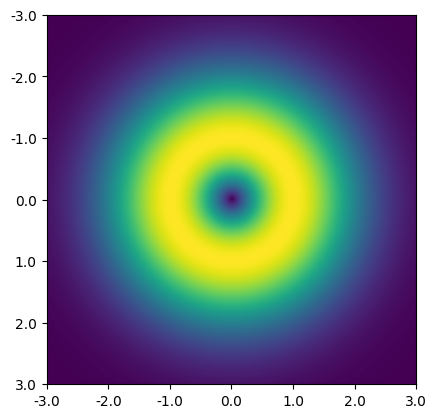

In [10]:
# Optimal proportional sampling to estimate average distance...
x_grid = np.linspace(-3,3,1000)
x,y = np.meshgrid(x_grid,x_grid)
tmp = (x**2+y**2)**.5*stats.multivariate_normal(mean=[0,0]).pdf(np.array([x.ravel(),y.ravel()]).T).reshape(1000,1000)
plt.imshow(tmp)
plt.xticks(np.linspace(0,1000,7), np.linspace(-3,3,7)); plt.yticks(np.linspace(0,1000,7), np.linspace(-3,3,7));

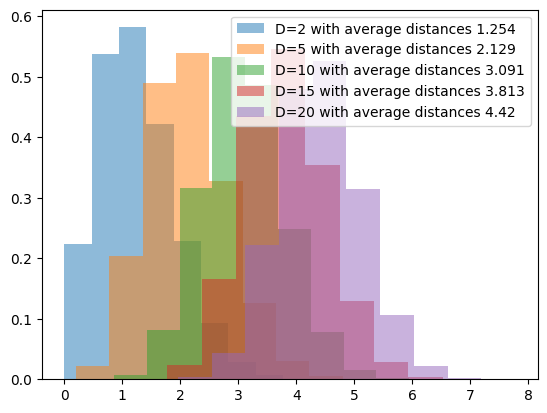

In [16]:
# Is closely achieved by multivariate normal distributions???

# The "mass" of a "mound" shape in higher dimensions is actually spherical
# as seen by examining the distances from the mean of the sample vectors 
# given by (x**2).sum()**0.5
plt.figure()
n = 100000
for D in [2,5,10,15,20]:
    f = stats.multivariate_normal([0]*D)
    x = f.rvs(n)
    plt.hist((x**2).sum(axis=1)**0.5, density=True, alpha=0.5,
             label="D="+str(D)+" with average distances "+str(round(((x**2).sum(axis=1)**0.5).mean(),3)))
plt.legend();

### What this means for $\frac{1}{n}\sum_{i=1}^n{f(x_0|\theta_{p|x}^{(i)})} \textrm{ for } \theta_{p|x}^{(i)} \sim \boldsymbol{\theta_{p|x}}$ versus $f(x_0|\hat \theta)$

If you have a high dimensional likelihood, or if you're Bayesian and you suppose you can make your way to a posterior, the optimum is not representative "what's usual" for the set of plausible outcomes.



## Hamiltonian Dynamics

Consider the ***log joint probability distribution*** for random varialbes $\theta$ and $v$ with $\dim(v)=\dim(\theta)$ 

$$\Large
\begin{align*}
H(\theta, v) = {} & U(\theta) + K(v|\theta) \\
\text{often simplified to } \Longrightarrow \quad = {} & U(\theta) + K(v) \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad
\end{align*}$$

> You care about sampling value from $\theta$ but $v$ is a completely ***auxilliary variable*** that you just made up and augmented $\theta$ through $K(v|\theta)$ which which probably just independent $K(v)$

#### <u>Physics people:</u>

This is a **hamiltonian dynamics system** which decomposes the **total energy** $H(\theta, v)$ into **potential** $U(\theta)$ and **kinetic** $K(v)$ **energy** (the latter or which is often called **momentum** or **velocity**)

This system obeys the ***law of conservation of energy*** when evolved according to the differential equations 

$$\Large \begin{align*} 
\frac{d\theta}{dt} & = {} \frac{dH}{dv}(v(t)) & \frac{dv}{dt} & = {}  -\frac{dH}{d\theta}(\theta(t))\\
\end{align*}$$

#### <u>Statistics people:</u>

The **energies** $\theta_0 \overset{time}{\rightarrow} \theta_t$ and $v_0 \overset{time}{\rightarrow} v_t$ evolve over time but the (log joint density) **total energy** stays constant $ p(\theta_0, v_0\color{gray}{|x}) =  p(\theta_t, v_t\color{gray}{|x})$ 

#### <u>Physics people:</u>

The variables $U$ and $v$ are evolved over time so the **potential** $U(\theta)$ and **kinetic** $K(v)$ **energy** are always inversely synchronized so the **total energy** remains constant

#### <u>Statistics people:</u>

You're walking on the countours of a distribution

- [Radford Neal "MCMC using Hamiltonian dynamics"](https://arxiv.org/pdf/1206.1901)
- [Michael Betancourt "A Conceptual Introduction to Hamiltonian Monte Carlo"](https://arxiv.org/pdf/1701.02434)
- [Alex Rogozhnikov "Hamiltonian Monte Carlo explained"](https://arogozhnikov.github.io/2016/12/19/markov_chain_monte_carlo.html)

### Normal Energy

If $p(\theta, v)$ is an **isotropic bivariate normal distribution** then 

$$H(\theta, v) = \log p(\theta, v) \overset{\large \theta \perp\!\!\!\perp v}{=} \log[p(\theta)q(v)] = \log p(\theta) + \log q(v) = U(\theta) + K(v) = \frac{1}{2}\theta^2 +\frac{1}{2}v^2$$

and **conservation of energy** $U(\theta) + K(v)$ is achieved if 

\begin{align} \frac{d\theta}{dt} & = {} \frac{dH}{dv} & \frac{dv}{dt} & = {}  -\frac{dH}{d\theta} \\ & = {} \frac{dK}{dv} = v & & = {}   -\frac{dU}{d\theta}= -\theta  \end{align}

## Differential Equations

The paths of $\theta$ and $v$ which which satisfy these differential equations have the form

$$ \theta_t = \theta(t) = r \cos(a + t) \quad \text{ and } \quad v_t = v(t) = -r \sin(a + t)$$

and they evolve $\theta(t)$ and $v(t)$ on the contours of a unit circle (which are the contours of an isotropic bivariate normal distribution).


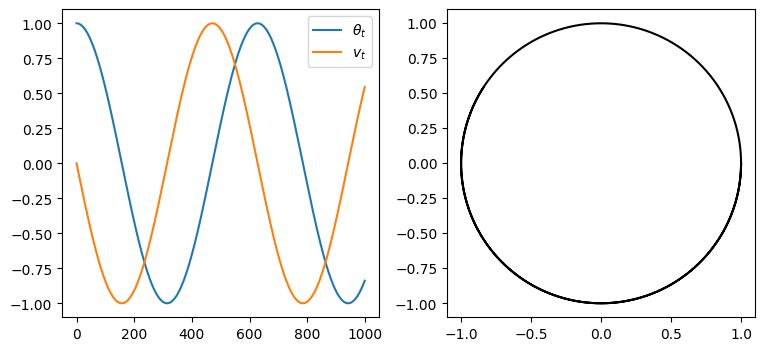

In [32]:
# for example
r,a = 1,0 
t = np.linspace(0,10,1000)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,4));

ax[0].plot(r*np.cos(a+t), label='$\\theta_t$')
ax[0].plot(-r*np.sin(a+t), label='$v_t$')
ax[0].legend()

ax[1].plot(np.cos(t), -np.sin(t), 'k')
ax[1].set_aspect('equal', adjustable='box') 

## Symplectic Integration<br>(discretely approximated differential equations)


> These processes are referred to as integration because they compute a summation series just like how Riemann sums add up areas under a curve. Indeed, solutions to differential equations are the integrals of the functions which when differentiated solve the equations. 
>
> If you thought you'd escaped Monte Carlo integration, you've certainly not yet escaped integration (and actually you haven't quite yet escaped Monte Carlo integration yet either).

The following numerically approximate the solution trajectory of differential equations.

1. ***Euler's method***: not a ***symplectic integrator***

$$\begin{align} 
\theta(t+\epsilon) & = {} \theta(t) + \epsilon \frac{d\theta(t)}{d t} &
v(t+\epsilon) & = {} v(t) + \epsilon \frac{dv(t)}{d t}\\
& = {} \theta(t) + \epsilon v(t) &
& = {} v(t) - \epsilon \theta(t)
\end{align}$$


2. ***Euler's method*** (***improved variant***): a ***first order symplectic integrator***

$$\begin{align} 
\theta(t+\epsilon) & = {} \theta(t) + \epsilon \frac{d\theta(t)}{d t} & 
v(t+\epsilon) & = {} v(t) + \epsilon \frac{dv(t+\epsilon)}{d t}\\
& = {} \theta(t) + \epsilon v(t) &
& = {} v(t) - \epsilon \theta(t+\epsilon)
\end{align}$$


3. The ***leapfrog method*** (or ***leapfrog integration***): a  ***second order symplectic integrator***

$$\begin{align} 
\theta(t+\epsilon/2) & = {} \theta(t) + \frac{\epsilon}{2} \frac{d\theta(t)}{d t} &
v(t+\epsilon) & = {} v(t) + \epsilon \frac{dv(t+\epsilon/2)}{d t} &
\theta(t+\epsilon) & = {} \theta(t + \epsilon/2) + \frac{\epsilon}{2} \frac{d\theta(t + \epsilon)}{d t}\\
& = {} \theta(t) + \frac{\epsilon}{2} v(t)&
& = {} v(t) - \epsilon \theta(t+\epsilon/2)&
& = {} \theta(t + \epsilon/2) + \frac{\epsilon}{2} v(t+\epsilon)
\end{align}$$



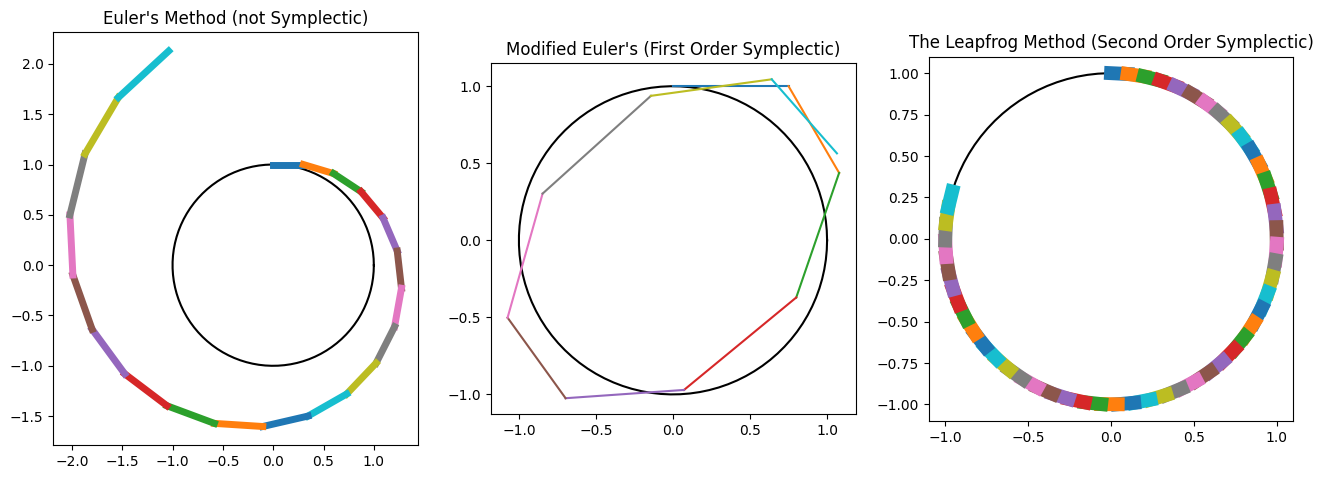

In [44]:
t = np.linspace(0,2*np.pi, 100)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8)) 

for i in range(3):
    ax[i].plot(np.cos(t), -np.sin(t), 'k')
    ax[i].set_aspect('equal', adjustable='box')
    
ax[0].set_title("Euler's Method (not Symplectic)")
theta_t, v_t, t, epsilon = 0, 1, 0, .3
for i in range(20):
    v_t_e = v_t - epsilon * theta_t
    theta_t_e = theta_t + epsilon * v_t
    ax[0].plot([theta_t, theta_t_e], [v_t, v_t_e], linewidth=5) 
    theta_t, v_t, t = theta_t_e, v_t_e, t+epsilon 

ax[1].set_title("Modified Euler's (First Order Symplectic)")
theta_t, v_t, t, epsilon = 0, 1, 0, .75
for i in range(10):
    v_t_e = v_t - epsilon * theta_t
    theta_t_e = theta_t + epsilon * v_t_e
    ax[1].plot([theta_t, theta_t_e], [v_t, v_t_e]) 
    theta_t, v_t, t = theta_t_e, v_t_e, t+epsilon
    
ax[2].set_title("The Leapfrog Method (Second Order Symplectic)")
theta_t, v_t, t, epsilon = 0, 1, 0, .1
for i in range(50):
    v_t_e = v_t - epsilon / 2 * theta_t
    theta_t_e = theta_t + epsilon * v_t_e
    v_t_e = v_t_e - epsilon / 2 * theta_t_e
    ax[2].plot([theta_t, theta_t_e], [v_t, v_t_e], linewidth=10) 
    theta_t, v_t, t = theta_t_e, v_t_e, t+epsilon

## Hamiltonian Monte Carlo<br><sub>Remember Metropolis-Hastings...</sub>


To produce draws from $p(x^{(t)})$ samples from a **proposal distribution** $\tilde x^{(t)} \sim q(\tilde x^{(t)}|x^{(t-1)})$ and "flip a coin" to accept or reject the proposal according to 

$x^{(t)} = \left\{\begin{array}{ll}
\tilde x^{(t)} & \text{with probability } \min\left(1,\frac{p(\tilde x^{(t)})}{p(x^{(t-1)})}\frac{q(x^{(t-1)}|\tilde x^{(t)})}{q(\tilde x^{(t)}|x^{(t-1)})}\right) \quad \color{gray}{\begin{array}{c}\textrm{... is the normalizing constant needed for $p$?}\\\textrm{... and what happens if $q$ is symmetric?}  \end{array}}\\
x^{(t-1)} & \text{otherwise}
\end{array}\right.$

---

1. Randomly sampling a number of discrete approximation steps (from some discrete distribution you choose)


2. Evolve to $\theta_t$ and $v_t$ to create a **Metropolis-Hastings** proposal distribution $\tilde p( \theta_t,  v_t|\theta_0,v_0)$ with an **aceptance probability** of $1$

  $$\require{cancel}\min\left(1,\cancel{\frac{p( \theta_t,  v_t|x)}{p(\theta_0,v_0|x)}}^1\cancel{\frac{ \tilde p(\theta_0,v_0| \theta_t,  v_t)}{\tilde p( \theta_t,  v_t|\theta_0,v_0)}}^1\right)$$ 

  assuming proposals $ \theta_t$ and $ v_t$ are on the same **contour** of the **log joint probability distribution** as initial values $\theta_0$ and $v_0$ (so the first ratio cancels) and the symplectic integration is **reversible** (so the second ratio cancels)
  
  <u>*Pause: do not yet accept this transition.*</u>


3. **Symmetrically randomly** perturb the **momentum** $v_t$ to $v_t+\epsilon$ to incease or decrease the overall **energy** up or down to higher or lower levels of the contours of the **log joint probability distribution** and accept now accept the full **Metropolis-Hastings** proposal with an **aceptance probability** of 

   $$\require{cancel}\min\left(1,{\frac{p( \theta_t, v_t+\epsilon|x)}{p(\theta_t,v_t|x)}}\cancel{\frac{\tilde q(\theta_t,v_t)|\theta_t,v_t+\epsilon)}{\tilde q(\theta_t,v_t+\epsilon| \theta_t,  v_t)}}^1 \cancel{\frac{ \tilde p(\theta_0,v_0| \theta_t,  v_t)}{\tilde p( \theta_t,  v_t|\theta_0,v_0)}}^1 \right)$$

  where the second proposal distribution $\tilde q(\theta_t,  v_t+\epsilon|\theta_t,v_t)$ ratio cancels due to the symmetry.

### Hamiltonian Monte Carlo is just smart Metropolis-Hastings<br>that might actually work in high dimensions<br><sub>Random perturbations in high dimesions just like uniform random samples in high dimensions<br>will not land on the density of interest... high dimensional space is too big...</sub>



0.853

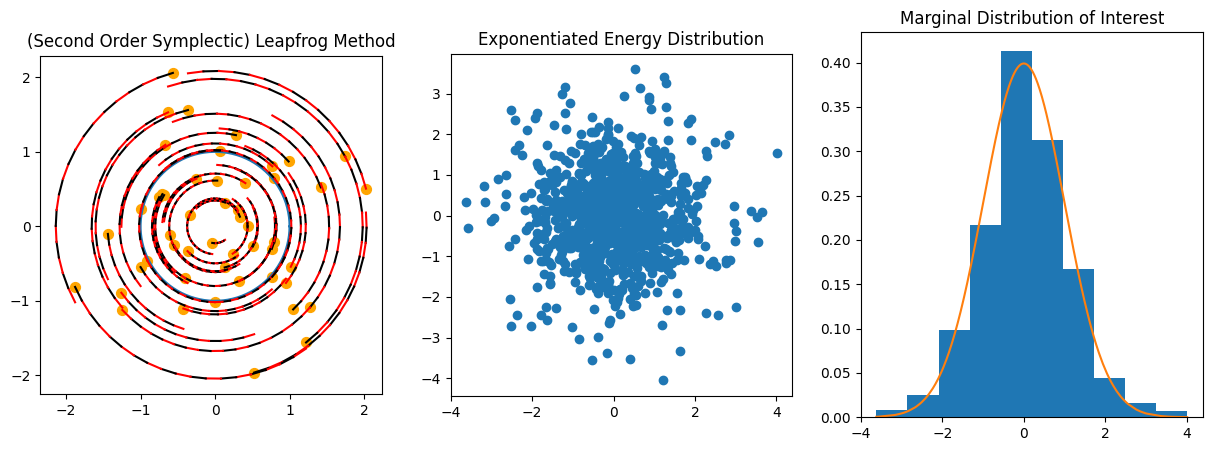

In [45]:
t = np.linspace(0,2*np.pi, 100); 
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(np.cos(t), -np.sin(t))
ax[0].set_aspect('equal', adjustable='box')
ax[1].set_aspect('equal', adjustable='box')
ax[0].set_title("(Second Order Symplectic) Leapfrog Method")
ax[1].set_title("Exponentiated Energy Distribution")
ax[2].set_title("Marginal Distribution of Interest")

theta_t, v_t, t, epsilon = 0, 1, 0, .1; 

m = 1000
theta_ts = np.zeros(m)
v_ts = np.zeros(m)

plotting = 50
accept = 0
for j in range(m):
    
    v_t_prop = v_t + stats.norm(scale=0.5).rvs()
    MH_acceptance_probability = \
    min(1,stats.norm().pdf(v_t_prop)/stats.norm().pdf(v_t))
    if stats.uniform().rvs()<MH_acceptance_probability:
        v_t = v_t_prop
        accept += 1

    for i in range(stats.poisson(15).rvs()):
        v_t_e = v_t - epsilon / 2 * theta_t
        theta_t_e = theta_t + epsilon * v_t_e
        v_t_e = v_t_e - epsilon / 2 * theta_t_e
        if j < plotting:
            ax[0].plot([theta_t, theta_t_e], [v_t, v_t_e], color=['r','k'][i%2]) 
        theta_t, v_t, t = theta_t_e, v_t_e, t+epsilon
    if j < plotting:
        ax[0].scatter(theta_t, v_t, s=50, color='orange');
        
    theta_ts[j] = theta_t
    v_ts[j] = v_t
        
ax[1].scatter(theta_ts, v_ts)
ax[2].hist(theta_ts, density=True)
ax[2].plot(sorted(theta_ts), stats.norm().pdf(sorted(theta_ts)))
accept/m